# ML Project 6033657523 - Linear Regression

## Importing the libraries

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the cleaned dataset

In [0]:
dataset = pd.read_csv('cleanData_Final.csv')
X = dataset[['PrevAVGCost', 'PrevAssignedCost', 'AVGCost', 'LatestDateCost', 'A', 'B', 'C', 'D', 'E', 'F', 'G']]
y = dataset['GenPrice']

In [8]:
X

,PrevAVGCost,PrevAssignedCost,AVGCost,LatestDateCost,A,B,C,D,E,F,G
0,27.919192,33.0,28.545455,20.535354,1,0,0,0,0,0,0
1,57.333333,63.0,56.121212,61.838384,1,0,0,0,0,0,0
2,50.777778,54.0,45.131313,50.000000,1,0,0,0,0,0,0
3,45.747475,56.0,40.525253,38.080808,0,1,0,0,0,0,0
4,45.747475,56.0,40.525253,38.080808,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
24621,0.000000,60.0,0.000000,0.000000,0,0,0,0,0,0,1
24622,80.808081,96.0,0.000000,0.000000,0,0,0,0,0,0,1
24623,0.000000,23.0,25.131313,25.131313,0,0,0,0,0,0,1
24624,151.515152,201.0,181.818182,181.818182,0,0,0,0,0,0,1


In [9]:
y

0         41.0
1         92.0
2         76.0
3         75.0
4         75.0
         ...  
24621     87.0
24622    126.0
24623     40.0
24624    271.0
24625    107.0
Name: GenPrice, Length: 24626, dtype: float64

## Splitting the dataset into the Training set and Test set

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [11]:
print (X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(19700, 11) (19700,) (4926, 11) (4926,)


## Multiple Linear Regression

### Fitting Multiple Linear Regression to the Training Set

In [12]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [13]:
trainSet = pd.concat([X_train, y_train], axis = 1)
trainSet.head()

,PrevAVGCost,PrevAssignedCost,AVGCost,LatestDateCost,A,B,C,D,E,F,G,GenPrice
17651,12.049180,30.0,18.196721,22.967213,1,0,0,0,0,0,0,42.0
22606,124.793814,130.0,0.000000,0.000000,0,0,1,0,0,0,0,169.0
14124,28.343434,29.0,32.959596,40.949495,0,0,1,0,0,0,0,60.0
5777,21.506024,24.0,22.963855,29.000000,1,0,0,0,0,0,0,36.0
15500,12.557895,13.0,14.452632,16.463158,1,0,0,0,0,0,0,25.0


In [14]:
testSet = pd.concat([X_test, y_test], axis = 1)
testSet.head()

,PrevAVGCost,PrevAssignedCost,AVGCost,LatestDateCost,A,B,C,D,E,F,G,GenPrice
12301,18.919192,20.0,17.707071,17.757576,1,0,0,0,0,0,0,27.0
13317,62.808081,67.0,73.484848,74.656566,1,0,0,0,0,0,0,105.0
12320,0.000000,61.0,0.000000,0.000000,1,0,0,0,0,0,0,88.0
4013,107.747475,110.0,80.808081,80.808081,0,0,0,0,0,0,1,142.0
7807,40.606061,50.0,61.505051,66.222222,0,0,1,0,0,0,0,99.0


## Applying Grid Search to find the best model and the best parameter

In [0]:
# from sklearn.model_selection import GridSearchCV
# parameters = [{'fit_intercept': [True, False], 'normalize': [True, False]}]

# grid_search = GridSearchCV(estimator = regressor,
#                            param_grid = parameters,
#                            scoring = 'accuracy',
#                            cv = 10,
#                            n_jobs = -1)

# grid_search = grid_search.fit(X_train, y_train)
# best_accuracy = grid_search.best_score_
# best_parameters = grid_search.best_params_
# print("Best Accuracy: {:.2f} %".format(best_accuracy*100))
# print("Best Parameters:", best_parameters)

## Evaluate model accuracy

In [16]:
y_pred = regressor.predict(X_test)
y_pred

array([32.39833046, 93.59897177, 85.36141747, ..., 98.0640314 ,
       30.07889309, 44.21871812])

In [17]:
predVal = pd.concat([X_test, y_test], axis = 1)
predVal.head()

,PrevAVGCost,PrevAssignedCost,AVGCost,LatestDateCost,A,B,C,D,E,F,G,GenPrice
12301,18.919192,20.0,17.707071,17.757576,1,0,0,0,0,0,0,27.0
13317,62.808081,67.0,73.484848,74.656566,1,0,0,0,0,0,0,105.0
12320,0.000000,61.0,0.000000,0.000000,1,0,0,0,0,0,0,88.0
4013,107.747475,110.0,80.808081,80.808081,0,0,0,0,0,0,1,142.0
7807,40.606061,50.0,61.505051,66.222222,0,0,1,0,0,0,0,99.0


Compare GenPrice with PredictedGenPrice

In [18]:
datasetPredict = pd.concat([testSet.reset_index(), pd.Series(y_pred, name = 'PredictedGenPrice')], axis = 1).round(2)
datasetPredict.head(10)

,index,PrevAVGCost,PrevAssignedCost,AVGCost,LatestDateCost,A,B,C,D,E,F,G,GenPrice,PredictedGenPrice
0,12301,18.92,20.0,17.71,17.76,1,0,0,0,0,0,0,27.0,32.40
1,13317,62.81,67.0,73.48,74.66,1,0,0,0,0,0,0,105.0,93.60
2,12320,0.00,61.0,0.00,0.00,1,0,0,0,0,0,0,88.0,85.36
3,4013,107.75,110.0,80.81,80.81,0,0,0,0,0,0,1,142.0,141.97
4,7807,40.61,50.0,61.51,66.22,0,0,1,0,0,0,0,99.0,81.59
5,439,0.00,13.0,0.00,0.00,0,0,1,0,0,0,0,33.0,31.52
6,9995,33.55,33.0,33.18,33.94,0,0,0,0,0,0,1,54.0,49.76
7,14270,48.82,84.0,50.51,50.51,1,0,0,0,0,0,0,117.0,114.03
8,11358,15.15,15.0,15.15,15.15,0,0,1,0,0,0,0,30.0,33.76
9,8320,22.69,25.0,22.88,22.47,0,0,0,0,0,0,1,52.0,39.86


In [19]:
datasetPredict.corr()

,index,PrevAVGCost,PrevAssignedCost,AVGCost,LatestDateCost,A,B,C,D,E,F,G,GenPrice,PredictedGenPrice
index,1.000000,-0.005980,0.003228,-0.004309,0.006373,-0.018983,-0.007056,0.006269,0.018399,0.012576,0.002493,0.012633,0.007801,0.003483
PrevAVGCost,-0.005980,1.000000,0.525551,0.784302,0.764423,-0.059053,0.124087,0.148206,-0.056017,-0.079911,0.080937,-0.101463,0.494235,0.498837
PrevAssignedCost,0.003228,0.525551,1.000000,0.524154,0.462267,-0.117272,0.105027,0.170726,-0.068318,-0.094067,0.037458,-0.028785,0.981192,0.997448
AVGCost,-0.004309,0.784302,0.524154,1.000000,0.878765,-0.055066,0.126399,0.132833,-0.054911,-0.079057,0.076166,-0.094352,0.529382,0.540697
LatestDateCost,0.006373,0.764423,0.462267,0.878765,1.000000,-0.050260,0.149702,0.146129,-0.053841,-0.079573,0.085198,-0.125042,0.473442,0.469909
A,-0.018983,-0.059053,-0.117272,-0.055066,-0.050260,1.000000,-0.254609,-0.424238,-0.097037,-0.119567,-0.077771,-0.593428,-0.130243,-0.128381
B,-0.007056,0.124087,0.105027,0.126399,0.149702,-0.254609,1.000000,-0.105758,-0.024190,-0.029807,-0.019388,-0.147936,0.099396,0.101129
C,0.006269,0.148206,0.170726,0.132833,0.146129,-0.424238,-0.105758,1.000000,-0.040307,-0.049665,-0.032304,-0.246495,0.195184,0.193220
D,0.018399,-0.056017,-0.068318,-0.054911,-0.053841,-0.097037,-0.024190,-0.040307,1.000000,-0.011360,-0.007389,-0.056381,-0.073099,-0.073220
E,0.012576,-0.079911,-0.094067,-0.079057,-0.079573,-0.119567,-0.029807,-0.049665,-0.011360,1.000000,-0.009105,-0.069472,-0.101863,-0.102225


In [20]:
print("Training set accuracy = " + str(regressor.score(X_train, y_train)))
print("Test set accuracy = " + str(regressor.score(X_test, y_test)))

Training set accuracy = 0.9744516391509681
Test set accuracy = 0.9662655869064142


### MSE

In [21]:
from sklearn import metrics
print('MSE:', metrics.mean_squared_error(y_test, y_pred))

MSE: 341.6344272356035


MSE v1: 341.6344272356035<br>
MSE v2: 264.2473952812881 (With Margin)<br>
MSE v3: 341.5515637134753 (With Year)

### MAPE

In [22]:
def mean_absolute_percentage_error(y_test, y_pred):
  y_test, y_pred = np.array(y_test), np.array(y_pred)
  return np.mean(np.abs((y_test - y_pred)/y_test)) * 100

print('MAPE:', mean_absolute_percentage_error(y_test, y_pred))

MAPE: 10.289084465491953


MAPE v1: 10.289084465491953<br>
MAPE v2: 13.435531198965075 (With Margin)<br>
MAPE v3: 10.297197104084978 (With Year)

### Visualize

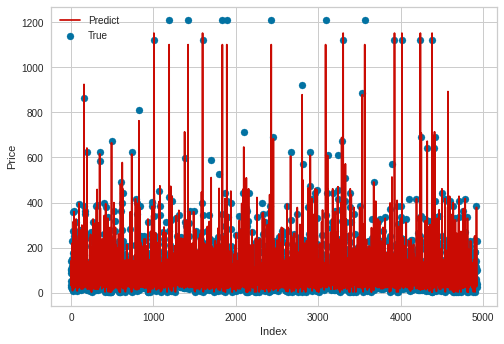

In [23]:
import matplotlib.pyplot as plt
plt.plot([i for i in range(len(y_pred))], y_pred, color = 'r')
plt.scatter([i for i in range(len(y_pred))], y_test, color = 'b')
plt.ylabel('Price')
plt.xlabel('Index')
plt.legend(['Predict', 'True'], loc = 'best')
plt.show()

## Building the optimal model using Backward Elimination

In [0]:
import statsmodels.api as sm

In [0]:
X_opt = X_opt = dataset.drop(['GenPrice'], axis=1)
regressor_OLS = sm.OLS(endog = y, exog = X_opt).fit()
print(regressor_OLS.summary())

In [0]:
X_opt = dataset.drop(['GenPrice'], axis=1)
regressor_OLS = sm.OLS(endog = y, exog = X_opt).fit()
print(regressor_OLS.summary())

In [0]:
X_opt_train, X_opt_test, y_train, y_test = train_test_split(X_opt, y, test_size = 0.2, random_state = 0)
regressor_opt = LinearRegression()
regressor_opt.fit(X_opt_train, y_train)
y_pred2 = regressor_opt.predict(X_opt_test)

In [0]:
datasetPredict = pd.concat([testSet.reset_index(), pd.Series(y_pred2, name = 'PredictedGenPrice')], axis = 1).round(2)
datasetPredict.head()

In [0]:
print("Training set accuracy = " + str(regressor_opt.score(X_opt_train, y_train)))
print("Test set accuracy = " + str(regressor_opt.score(X_opt_test, y_test)))

Compare with old dataset <br>
Training set accuracy = 0.9744516391509681<br>
Test set accuracy = 0.9662655869064142<br>
= Backward elimination doesn't works